In [2]:
pip install forcats

     |████████████████████████████████| 112kB 8.0MB/s 
  Created wheel for forcats: filename=forcats-0.0.1-cp36-none-any.whl size=1546 sha256=bd89aae4e10e8f33bc2fb290bc9dad8017d2ee6a570bf599228741c7931b0128
  Stored in directory: /root/.cache/pip/wheels/ce/c3/b9/17594d5fa27e0ca37e60a31725adc79966b81c88772bd43516
Successfully built forcats


In [3]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from siuba.dply.forcats import fct_lump, fct_reorder 
import warnings
warnings.filterwarnings('ignore')

In [4]:
ks = pd.read_csv('ks_combo.csv')

In [5]:
ks.shape

(702411, 13)

In [6]:
ks.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd.pledged
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000,2015-08-11 12:12:28,0,failed,0,GB,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000,2017-09-02 04:43:57,2421,failed,15,US,100
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000,2013-01-12 00:20:50,220,failed,3,US,220
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000,2012-03-17 03:24:11,1,failed,1,US,1
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283


In [7]:
ks.tail()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd.pledged
702406,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17 02:35:30,50000,2014-09-17 02:35:30,25,canceled,1,US,25
702407,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19 03:35:14,1500,2011-06-22 03:35:14,155,failed,5,US,155
702408,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16 05:59:00,15000,2010-07-01 19:40:30,20,failed,1,US,20
702409,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13 02:00:00,15000,2016-01-13 18:13:53,200,failed,6,US,200
702410,999988282,Nou Renmen Ayiti! We Love Haiti!,Performance Art,Art,USD,2011-08-16 09:07:47,2000,2011-07-19 09:07:47,524,failed,17,US,524


In [8]:
ks['state'].value_counts()

failed                 365940
successful             247037
canceled                71133
live                     7227
undefined                7117
                        ...  
4262                        1
2015-09-08 22:08:39         1
7271                        1
3671                        1
8609.6                      1
Name: state, Length: 410, dtype: int64

In [9]:
ks['main_category'].value_counts()

Film & Video    121264
Music            98662
Publishing       74107
Games            63239
Technology       58697
                 ...  
 pants               1
 Demons              1
Textiles             1
Metal                1
Vegan                1
Name: main_category, Length: 120, dtype: int64

In [10]:
ks['main_category'] = fct_lump(ks['main_category'], n= 11)

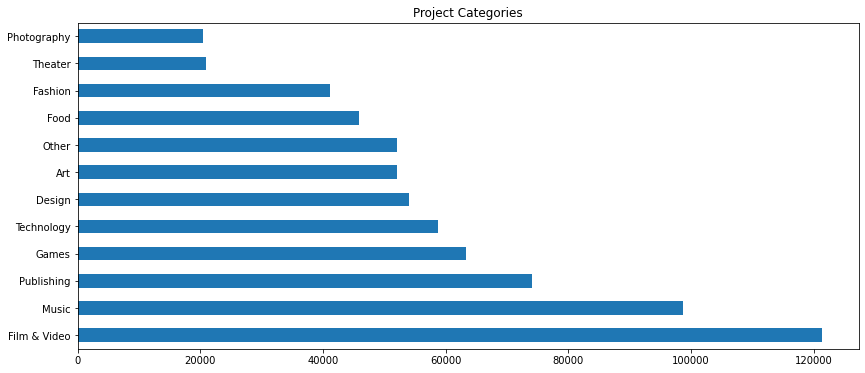

In [12]:
ks['main_category'].value_counts().plot(kind='barh', figsize=(14,6), title='Project Categories')

In [13]:
ks['currency'] = fct_lump(ks['currency'], n= 11)

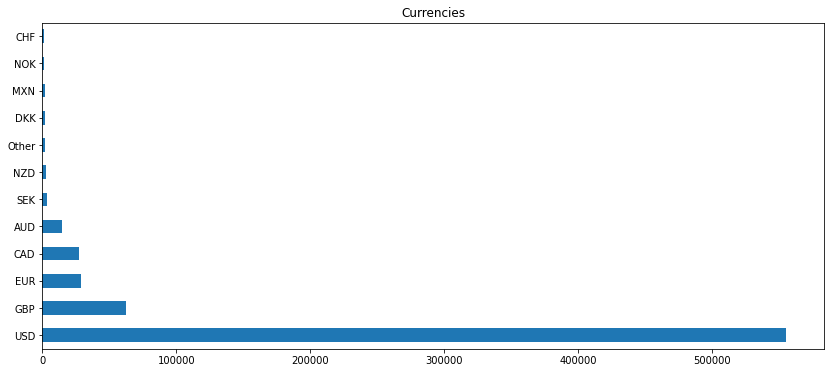

In [14]:
ks['currency'].value_counts().plot(kind='barh', figsize=(14,6), title='Currencies')

In [15]:
ks['country'] = fct_lump(ks['country'], n= 9)

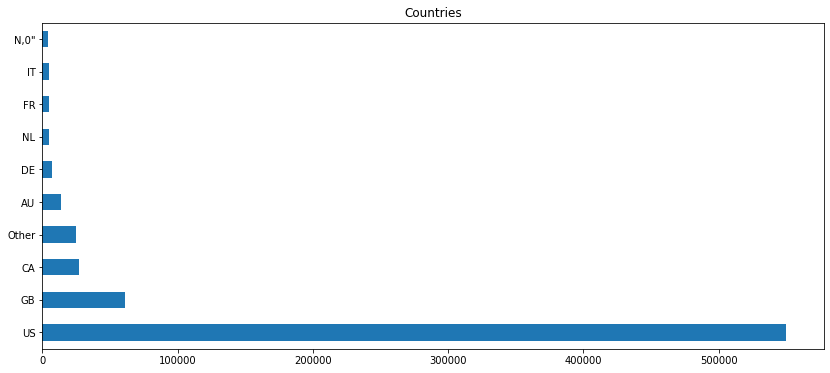

In [16]:
ks['country'].value_counts().plot(kind='barh', figsize=(14,6), title='Countries')

In [17]:
ks['country'].value_counts()

US       550192
GB        61181
CA        26748
Other     24959
AU        14075
DE         6855
NL         5127
FR         4849
IT         4628
N,0"       3797
Name: country, dtype: int64

In [18]:
ks['state'].isnull().sum()

0

In [19]:
ks['state'].isna().sum()

0

In [20]:
def state (series):
    if series == 'successful':
        return 'successful'
    else:
        return 'failed'

ks['state_lump'] = ks['state'].apply(state)

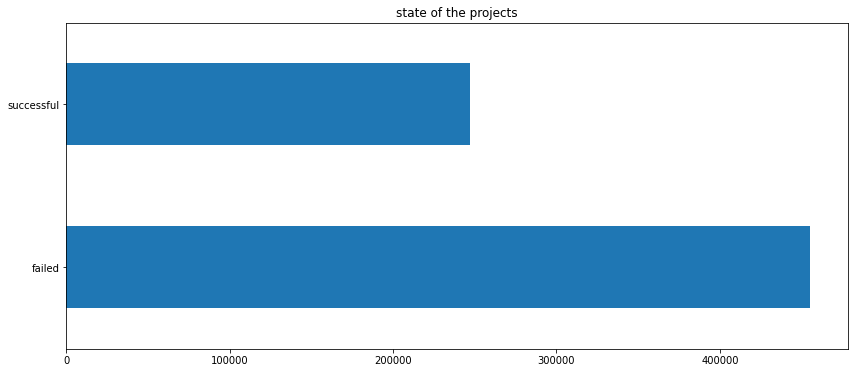

In [21]:
ks['state_lump'].value_counts().plot(kind='barh', figsize=(14,6), title='state of the projects')

In [22]:
ks.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd.pledged,state_lump
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000,2015-08-11 12:12:28,0,failed,0,GB,0,failed
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000,2017-09-02 04:43:57,2421,failed,15,US,100,failed
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000,2013-01-12 00:20:50,220,failed,3,US,220,failed
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000,2012-03-17 03:24:11,1,failed,1,US,1,failed
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,failed


In [29]:
from datetime import datetime
from datetime import timedelta

In [32]:
ks['launched'] = pd.to_datetime(ks['launched'], format='%Y-%m-%d', errors='coerce' )
ks['deadline'] = pd.to_datetime(ks['deadline'], format='%Y-%m-%d', errors='coerce' )

In [33]:
ks['launched_year']=ks['launched'].dt.year
ks['launched_year'].dropna(inplace=True)
ks['launched_year'] = ks['launched_year'].astype(int)

ValueError: ignored

In [34]:
ks['launched_month']=ks['launched'].dt.month

In [35]:
ks['launched_day']=ks['launched'].dt.day

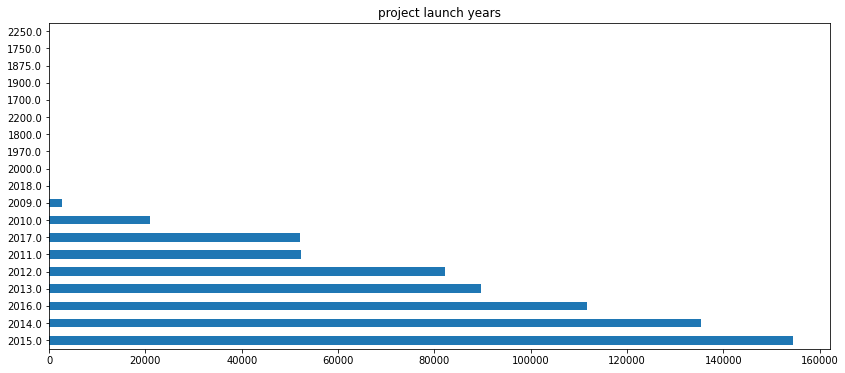

In [36]:
ks['launched_year'].value_counts().plot(kind='barh', figsize=(14,6), title='project launch years')

In [37]:
# visualize the date between years 2009-2017
a = ks[(ks['launched_year'] < 2018) & (ks['launched_year'] > 2007)]
a.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd.pledged,state_lump,launched_year,launched_month,launched_day
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000,2015-08-11 12:12:28,0,failed,0,GB,0,failed,2015.0,8.0,11.0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000,2017-09-02 04:43:57,2421,failed,15,US,100,failed,2017.0,9.0,2.0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000,2013-01-12 00:20:50,220,failed,3,US,220,failed,2013.0,1.0,12.0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000,2012-03-17 03:24:11,1,failed,1,US,1,failed,2012.0,3.0,17.0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,failed,2015.0,7.0,4.0


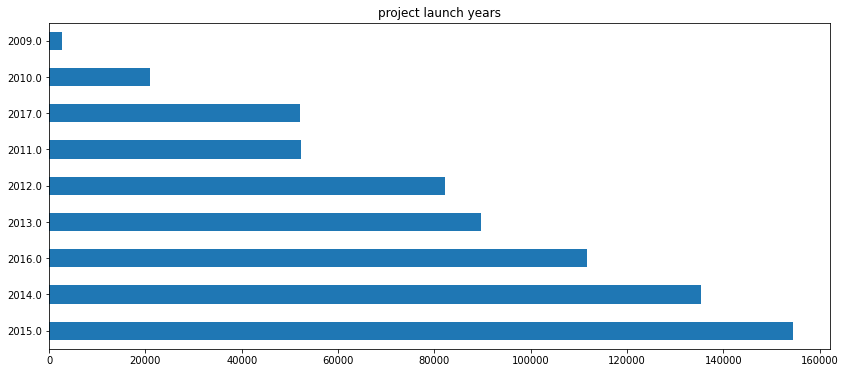

In [38]:
a['launched_year'].value_counts().plot(kind='barh', figsize=(14,6), title='project launch years')

In [39]:
ks_dummy = pd.get_dummies(ks, columns = ['main_category','state_lump', 'currency', 'country' ], drop_first = True)

print(list(ks_dummy.columns))


['ID', 'name', 'category', 'deadline', 'goal', 'launched', 'pledged', 'state', 'backers', 'usd.pledged', 'launched_year', 'launched_month', 'launched_day', 'main_category_Art', 'main_category_Design', 'main_category_Fashion', 'main_category_Film & Video', 'main_category_Food', 'main_category_Games', 'main_category_Music', 'main_category_Photography', 'main_category_Publishing', 'main_category_Technology', 'main_category_Theater', 'state_lump_successful', 'currency_AUD', 'currency_CAD', 'currency_CHF', 'currency_DKK', 'currency_EUR', 'currency_GBP', 'currency_MXN', 'currency_NOK', 'currency_NZD', 'currency_SEK', 'currency_USD', 'country_AU', 'country_CA', 'country_DE', 'country_FR', 'country_GB', 'country_IT', 'country_N,0"', 'country_NL', 'country_US']


In [40]:
ks_dummy.head()

,ID,name,category,deadline,goal,launched,pledged,state,backers,usd.pledged,launched_year,launched_month,launched_day,main_category_Art,main_category_Design,main_category_Fashion,main_category_Film & Video,main_category_Food,main_category_Games,main_category_Music,main_category_Photography,main_category_Publishing,main_category_Technology,main_category_Theater,state_lump_successful,currency_AUD,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_USD,country_AU,country_CA,country_DE,country_FR,country_GB,country_IT,"country_N,0""",country_NL,country_US
0,1000002330,The Songs of Adelaide & Abullah,Poetry,2015-10-09,1000,2015-08-11 12:12:28,0,failed,0,0,2015.0,8.0,11.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,2017-11-01,30000,2017-09-02 04:43:57,2421,failed,15,100,2017.0,9.0,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,1000004038,Where is Hank?,Narrative Film,2013-02-26,45000,2013-01-12 00:20:50,220,failed,3,220,2013.0,1.0,12.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,2012-04-16,5000,2012-03-17 03:24:11,1,failed,1,1,2012.0,3.0,17.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,2015-08-29,19500,2015-07-04 08:35:03,1283,canceled,14,1283,2015.0,7.0,4.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [41]:
ks_dummy['deadline']=pd.to_datetime(ks_dummy['deadline'], format="%Y/%m/%d",  errors='coerce').dt.date
ks_dummy['launched']=pd.to_datetime(ks_dummy['launched'], format="%Y/%m/%d").dt.date


ks_dummy['longevity'] = (ks_dummy['deadline'] - ks_dummy['launched']).dt.days

ks_dummy.longevity.head()

0    59.0
1    60.0
2    45.0
3    30.0
4    56.0
Name: longevity, dtype: float64

In [42]:
# How many days from launch day to deadline has passed for each project. 

In [43]:
ks_mean = ks[['main_category','pledged']]

In [44]:
ks_mean1 = pd.to_numeric(ks_mean['pledged'] , errors='coerce').groupby(ks_mean['main_category']).mean()

In [45]:
ks_mean1 = pd.DataFrame(ks_mean1)
sorted_pledge = ks_mean1.sort_values('pledged', ascending=False)
print(sorted_pledge)

                    pledged
main_category              
Design         25788.671833
Technology     21848.222988
Games          21351.519171
Fashion         6327.620362
Film & Video    6269.469818
Food            5217.865902
Other           4200.032061
Theater         4022.504375
Music           3919.288843
Publishing      3477.816587
Photography     3462.573504
Art             3420.555728


Design, Technology and Games have the highest mean of pledged money. The trio is the leader of categories by far!

In [46]:
ks_dummy['category'] = fct_lump(ks_dummy['category'], n= 11)
ks_days = ks_dummy[['category','longevity']]
ks_days = pd.to_numeric(ks_days['longevity'] , errors='coerce').groupby(ks_days['category']).mean()
ks_days = pd.DataFrame(ks_days)
sorted_days = ks_days.sort_values('longevity', ascending = False)
print(sorted_days)

                longevity
category                 
Film & Video    39.384416
Documentary     37.135933
Music           36.267666
Product Design  34.971752
Other           34.470363
Nonfiction      34.456558
Fiction         34.090575
Video Games     34.036320
Food            33.980114
Fashion         33.432945
Shorts          33.360429
Tabletop Games  31.194190


In [47]:
#Film & Video projects has longest campaign days

In [48]:
ks_mean2 = pd.to_numeric(ks['backers'] , errors='coerce').groupby(ks['main_category']).mean()
ks_mean2 = pd.DataFrame(ks_mean2)
sorted_backers = ks_mean2.sort_values('backers', ascending = False)
print(sorted_backers)

                  backers
main_category            
Games          322.834224
Design         239.612552
Technology     165.021999
Other           73.767558
Film & Video    66.234488
Fashion         61.812661
Publishing      54.273865
Food            54.262380
Music           51.784795
Theater         47.227210
Art             40.934986
Photography     38.603581


Design, Technology and Games have the highest mean of number of backers. The trio is leader for pledged mean as well, so we can understand the strong correlation of number of backers and pledged amount. 

In [49]:
import csv


filename = 'ks_dummy_coded.csv'
with open (filename, 'w') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(list(ks_dummy.columns))
    csvwriter.writerows(ks_dummy)
    # I can not believe writing data to csv in python is so much painful!!!

# Statistical Tests

Hypothesis: According to Kickstarter website stats, around 60% of the projects have failed. We want to test if this statistic is represented in our data using Goodness of Fit Chi-Squares test. (Source: https://www.kickstarter.com/help/stats)


In [70]:
import scipy, scipy.stats

In [71]:
ks.state_lump.value_counts()

failed        455374
successful    247037
Name: state_lump, dtype: int64

In [72]:
observed_values = scipy.array([455374, 247037])
expected_values = scipy.array([421446, 280965])

In [73]:
scipy.stats.chisquare(observed_values, f_exp=expected_values)

Power_divergenceResult(statistic=6828.3168294956, pvalue=0.0)

According to Goodness of Fit Chi-Squares test, Our data is significantly different than Kickstarter source data. Most likely the reason for this difference is we gathered all the values other than 'successfull' as 'failed ' under state column. 

Independent Chi-Square
Hypothesis: Main category and project state are independent. 

In [74]:
category_crosstab = pd.crosstab(ks['main_category'], ks['state_lump'])
category_crosstab


state_lump,failed,successful
main_category,,
Other,31536,20447
Art,30964,21164
Design,35433,18509
Fashion,31311,9903
Film & Video,76237,45027
Food,34490,11341
Games,41336,21903
Music,52702,45960
Photography,14251,6208


Crosstab for Main category and project state. Table shows frequencies for main category. 
Assumption of 5 cases per expected cell is passed easily. 

In [75]:
stats.chi2_contingency(category_crosstab)

(24186.5769647064, 0.0, 11, array([[33700.64910999, 18282.35089001],
        [33794.65280584, 18333.34719416],
        [34970.67145589, 18971.32854411],
        [26719.09186502, 14494.90813498],
        [78615.61498325, 42648.38501675],
        [29712.2992009 , 16118.7007991 ],
        [40997.92911273, 22241.07088727],
        [63962.70785623, 34699.29214377],
        [13263.59733262,  7195.40266738],
        [48043.66819141, 26063.33180859],
        [38053.34437815, 20643.65562185],
        [13539.77370799,  7345.22629201]]))

our p value is significant which means independence is rejected, there is significant correlations between main category and project state. 

In [76]:
country_crosstab = pd.crosstab(ks['country'], ks['state_lump'])
country_crosstab

state_lump,failed,successful
country,,
Other,19749,5210
AU,10615,3460
CA,19547,7201
DE,5388,1467
FR,3429,1420
GB,39774,21407
IT,3957,671
"N,0""",3692,105
NL,4100,1027


In [77]:
stats.chi2_contingency(country_crosstab)

(8569.608152574416, 0.0, 9, array([[ 16180.95341047,   8778.04658953],
        [  9124.84151017,   4950.15848983],
        [ 17340.76452675,   9407.23547325],
        [  4444.10575859,   2410.89424141],
        [  3143.61324922,   1705.38675078],
        [ 39663.72493312,  21517.27506688],
        [  3000.33865073,   1627.66134927],
        [  2461.60022836,   1335.39977164],
        [  3323.8410247 ,   1803.1589753 ],
        [356690.21670788, 193501.78329212]]))

Independence is rejected. Correlation between country and state of the project is significant. 


In [78]:
currency_crosstab = pd.crosstab(ks['currency'], ks['state_lump'])
currency_crosstab


state_lump,failed,successful
currency,,
Other,1614,447
AUD,10835,3462
CAD,19952,7207
CHF,973,273
DKK,1375,595
EUR,22863,6097
GBP,40665,21435
MXN,1568,398
NOK,990,272


In [79]:
stats.chi2_contingency(currency_crosstab)

(5638.724200233166, 0.0, 11, array([[  1336.14908366,    724.85091634],
        [  9268.76441001,   5028.23558999],
        [ 17607.21638186,   9551.78361814],
        [   807.78348289,    438.21651711],
        [  1277.15366075,    692.84633925],
        [ 18774.80711435,  10185.19288565],
        [ 40259.51387436,  21840.48612564],
        [  1274.56045535,    691.43954465],
        [   818.1563045 ,    443.8436955 ],
        [  1710.86726432,    928.13273568],
        [  2001.95457076,   1086.04542924],
        [360237.0733972 , 195425.9266028 ]]))

as expected, currency and state of the project are not independent, so they are correlated. 

In [80]:
test_crosstab = pd.crosstab(ks['country'], ks['main_category'])
test_crosstab

main_category,Other,Art,Design,Fashion,Film & Video,Food,Games,Music,Photography,Publishing,Technology,Theater
country,,,,,,,,,,,,
Other,1831,1397,2473,1494,2998,1279,2790,4040,570,2329,3441,317
AU,914,744,1604,1279,1731,897,1696,863,539,1477,2199,132
CA,2245,1944,2691,1852,3154,1956,3373,2153,749,2798,3473,360
DE,394,365,889,462,529,390,1072,499,361,481,1366,47
FR,280,287,490,414,455,239,811,295,172,281,1096,29
GB,4491,4801,4803,4230,10783,3003,7157,5054,2287,5892,5606,3074
IT,259,295,604,468,330,311,590,267,220,296,950,38
"N,0""",2,0,3,4,888,3,5,2388,1,495,7,1
NL,252,344,589,484,388,333,717,348,183,359,1090,40


In [81]:
stats.chi2_contingency(test_crosstab)

(31096.009521422,
 0.0,
 99,
 array([[ 1847.12895584,  1852.28128831,  1916.73874413,  1464.47055356,
          4308.91340825,  1628.52792596,  2247.09208854,  3505.78914339,
           726.97634433,  2633.26829022,  2085.69971569,   742.11354179],
        [ 1041.64189485,  1044.54742309,  1080.89658334,   825.85131782,
          2429.90329024,   918.36734476,  1267.19103915,  1977.00157031,
           409.96001629,  1484.96539063,  1176.17787164,   418.49625789],
        [ 1979.52663611,  1985.04827516,  2054.12588356,  1569.44021663,
          4617.76576961,  1745.25681973,  2408.15814673,  3757.07552416,
           779.08422846,  2822.01451287,  2235.19756382,   795.30642316],
        [  507.31475589,   508.7298462 ,   526.43311395,   402.21746243,
          1183.44490619,   447.27588976,   617.16480095,   962.86648415,
           199.66436317,   723.22825952,   572.83831688,   203.82180091],
        [  358.85765884,   359.85864686,   372.38135223,   284.51531368,
           837.129

Two sampled t-test Hypothesis: 

In [82]:
from scipy.stats import ttest_ind

In [83]:
scipy.stats.ttest_ind(ks['state_lump'] == 'failed', ks['state_lump'] == 'successful', equal_var=False)

Ttest_indResult(statistic=368.11340576261455, pvalue=0.0)

In [84]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [85]:
ks.loc[:,'pledged'].describe()

count     702411
unique    112634
top            0
freq       52804
Name: pledged, dtype: object

test the mean of pledge difference for main categories or countries. pd.to_numeric(df4['Sales']).groupby(df4['Company'])

In [86]:
# Try anova test longevity and pledged values.
print(list(ks_dummy))

['ID', 'name', 'category', 'deadline', 'goal', 'launched', 'pledged', 'state', 'backers', 'usd.pledged', 'launched_year', 'launched_month', 'launched_day', 'main_category_Art', 'main_category_Design', 'main_category_Fashion', 'main_category_Film & Video', 'main_category_Food', 'main_category_Games', 'main_category_Music', 'main_category_Photography', 'main_category_Publishing', 'main_category_Technology', 'main_category_Theater', 'state_lump_successful', 'currency_AUD', 'currency_CAD', 'currency_CHF', 'currency_DKK', 'currency_EUR', 'currency_GBP', 'currency_MXN', 'currency_NOK', 'currency_NZD', 'currency_SEK', 'currency_USD', 'country_AU', 'country_CA', 'country_DE', 'country_FR', 'country_GB', 'country_IT', 'country_N,0"', 'country_NL', 'country_US', 'longevity']


In [87]:
ks7 = ks_dummy[['pledged', 'backers', 'longevity', 'goal']]
ks7 = pd.DataFrame(ks7)
ks7['backers'] = pd.to_numeric(ks7[ 'backers'] , errors='coerce')
ks7['pledged'] = pd.to_numeric(ks7['pledged'] , errors='coerce')
ks7['goal'] = pd.to_numeric(ks7[ 'goal'] , errors='coerce')



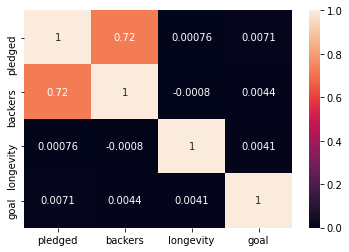

In [89]:
sns.heatmap(ks7.corr(), annot=True)


# Preprocessing and Modeling with sklearn

In [90]:
from sklearn import svm
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier

In [91]:
ks.isnull().sum()/ks.shape[0]
#ks = ks.dropna(axis=0, subset=['name', 'category', 'main_category', 'currency', ])

ID                0.000000
name              0.000011
category          0.000007
main_category     0.000000
currency          0.000000
deadline          0.000900
goal              0.000000
launched          0.000830
pledged           0.000000
state             0.000000
backers           0.000000
country           0.000000
usd.pledged       0.010801
state_lump        0.000000
launched_year     0.000830
launched_month    0.000830
launched_day      0.000830
dtype: float64

In [92]:
# 1% of pledged data is NULL 

In [93]:
ks_dummy.isna().sum()

ID                               0
name                             8
category                         5
deadline                       632
goal                             0
launched                       583
pledged                          0
state                            0
backers                          0
usd.pledged                   7587
launched_year                  583
launched_month                 583
launched_day                   583
main_category_Art                0
main_category_Design             0
main_category_Fashion            0
main_category_Film & Video       0
main_category_Food               0
main_category_Games              0
main_category_Music              0
main_category_Photography        0
main_category_Publishing         0
main_category_Technology         0
main_category_Theater            0
state_lump_successful            0
currency_AUD                     0
currency_CAD                     0
currency_CHF                     0
currency_DKK        

# Univariate Feature Selection Method with SelectKBest

In [94]:
print(list(ks_dummy))

['ID', 'name', 'category', 'deadline', 'goal', 'launched', 'pledged', 'state', 'backers', 'usd.pledged', 'launched_year', 'launched_month', 'launched_day', 'main_category_Art', 'main_category_Design', 'main_category_Fashion', 'main_category_Film & Video', 'main_category_Food', 'main_category_Games', 'main_category_Music', 'main_category_Photography', 'main_category_Publishing', 'main_category_Technology', 'main_category_Theater', 'state_lump_successful', 'currency_AUD', 'currency_CAD', 'currency_CHF', 'currency_DKK', 'currency_EUR', 'currency_GBP', 'currency_MXN', 'currency_NOK', 'currency_NZD', 'currency_SEK', 'currency_USD', 'country_AU', 'country_CA', 'country_DE', 'country_FR', 'country_GB', 'country_IT', 'country_N,0"', 'country_NL', 'country_US', 'longevity']


In [95]:
remove_col = ['ID', 'name', 'category', 'deadline','launched','state']
ks_dummy2 = ks_dummy.drop(remove_col, axis=1) # removed the columns not among the predictors. 


In [96]:
print(list(ks_dummy2))

['goal', 'pledged', 'backers', 'usd.pledged', 'launched_year', 'launched_month', 'launched_day', 'main_category_Art', 'main_category_Design', 'main_category_Fashion', 'main_category_Film & Video', 'main_category_Food', 'main_category_Games', 'main_category_Music', 'main_category_Photography', 'main_category_Publishing', 'main_category_Technology', 'main_category_Theater', 'state_lump_successful', 'currency_AUD', 'currency_CAD', 'currency_CHF', 'currency_DKK', 'currency_EUR', 'currency_GBP', 'currency_MXN', 'currency_NOK', 'currency_NZD', 'currency_SEK', 'currency_USD', 'country_AU', 'country_CA', 'country_DE', 'country_FR', 'country_GB', 'country_IT', 'country_N,0"', 'country_NL', 'country_US', 'longevity']


In [107]:
ks_dummy2['pledged'] = pd.to_numeric(ks_dummy2['pledged'], errors='coerce') # converting column values to float
ks_dummy2['backers'] = pd.to_numeric(ks_dummy2['backers'] , errors='coerce')
ks_dummy2['goal'] = pd.to_numeric(ks_dummy2['goal'] , errors='coerce')
ks_dummy2['usd.pledged'] = pd.to_numeric(ks_dummy2['usd.pledged'] , errors='coerce')
ks_dummy2 = ks_dummy2.dropna() # SelectKBest can not process NaN values
ks_dummy2.head()

,goal,pledged,backers,usd.pledged,launched_year,launched_month,launched_day,main_category_Art,main_category_Design,main_category_Fashion,main_category_Film & Video,main_category_Food,main_category_Games,main_category_Music,main_category_Photography,main_category_Publishing,main_category_Technology,main_category_Theater,state_lump_successful,currency_AUD,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_USD,country_AU,country_CA,country_DE,country_FR,country_GB,country_IT,"country_N,0""",country_NL,country_US,longevity
0,1000.0,0.0,0.0,0.0,2015.0,8.0,11.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,59.0
1,30000.0,2421.0,15.0,100.0,2017.0,9.0,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,60.0
2,45000.0,220.0,3.0,220.0,2013.0,1.0,12.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,45.0
3,5000.0,1.0,1.0,1.0,2012.0,3.0,17.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,30.0
4,19500.0,1283.0,14.0,1283.0,2015.0,7.0,4.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,56.0


In [98]:
drop_col= ['state_lump_successful']
X = ks_dummy2.drop(drop_col, axis =1) # dropped the target column, the rest wil be our predictors. 
y = ks_dummy2['state_lump_successful'] # selected the target column that will be predicted

In [99]:
# instantiate SelectKBest to determine 20 best features
best_features = SelectKBest(score_func = f_classif, k=20)
fit = best_features.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

In [100]:
# concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores], axis = 1)
feature_scores.columns = ['Feature_Name', 'Score'] 
print(feature_scores.nlargest(20, 'Score')) # print 20 best features

                Feature_Name         Score
2                    backers  10853.523192
13       main_category_Music   8368.781880
1                    pledged   8238.745783
4              launched_year   7782.534595
16  main_category_Technology   7203.109865
3                usd.pledged   6933.383438
17     main_category_Theater   5657.835173
28              currency_USD   3426.360573
37                country_US   3426.360573
22              currency_EUR   2654.952375
9      main_category_Fashion   2542.629462
11        main_category_Food   2500.433948
19              currency_CAD    906.332939
30                country_CA    906.332939
34                country_IT    902.759043
15  main_category_Publishing    789.669454
18              currency_AUD    755.795418
29                country_AU    755.795418
7          main_category_Art    629.255956
31                country_DE    605.974910


In [101]:
# Based on the features we can say; 'Number of backers', ' main category', 'pledged amount', 'launch time' and 'country' are the most important features of predictors.a

In [102]:
# export selected features to .csv
df_univ_feat = feature_scores.nlargest(20,'Score')
df_univ_feat.to_csv('feature_selection_UNIVARIATE.csv', index=False)

# Feature Selection Using Feature Importance Method

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
rf_model = RandomForestClassifier()
rf_model.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [105]:
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
# determine 20 most important features
df_imp_feat = feat_importances.nlargest(20)
print(rf_model.feature_importances_)

[2.48819676e-01 2.56657949e-01 2.30073834e-01 1.84492895e-01
 1.39951921e-02 8.41254253e-03 9.79690233e-03 1.39211402e-03
 3.21211477e-03 1.06632385e-03 1.17937384e-03 1.16155199e-03
 2.98125466e-03 4.68630821e-03 3.87645285e-04 8.14131062e-04
 4.42361970e-03 2.22984556e-03 2.50770368e-04 3.83962523e-04
 7.45527955e-05 2.28138115e-04 7.70378894e-04 6.55174903e-04
 1.72716029e-04 1.24713605e-04 1.18469917e-04 3.12852709e-04
 1.19271261e-03 2.61928936e-04 3.70998008e-04 2.02245053e-04
 1.65607643e-04 7.56306905e-04 1.82258007e-04 0.00000000e+00
 1.74521919e-04 1.07824880e-03 1.67401686e-02]


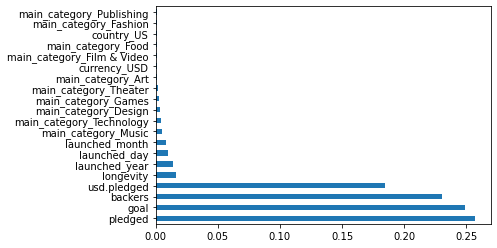

pledged                       0.256658
goal                          0.248820
backers                       0.230074
usd.pledged                   0.184493
longevity                     0.016740
launched_year                 0.013995
launched_day                  0.009797
launched_month                0.008413
main_category_Music           0.004686
main_category_Technology      0.004424
main_category_Design          0.003212
main_category_Games           0.002981
main_category_Theater         0.002230
main_category_Art             0.001392
currency_USD                  0.001193
main_category_Film & Video    0.001179
main_category_Food            0.001162
country_US                    0.001078
main_category_Fashion         0.001066
main_category_Publishing      0.000814
dtype: float64


In [106]:
# plot 20 most important features
# feat_importances.nlargest(20).plot(kind='barh')
df_imp_feat.plot(kind='barh')
plt.show()
print(df_imp_feat)

# Logistic Regression model

In [108]:
# Based on the features we can say; 'Number of backers', ' main category', 'pledged amount', 'longevity' as duration of the campaign, 'launch time' and 'country' (US single most important country determines state of the project) are the most important features of predictors.
logit_data = ks_dummy2[['state_lump_successful', 'pledged', 'backers', 'main_category_Art', 'main_category_Design', 'main_category_Fashion', 'main_category_Film & Video', 'main_category_Food', 'main_category_Games', 'main_category_Music', 'main_category_Photography', 'main_category_Publishing', 'main_category_Technology', 'main_category_Theater', 'country_US', 'launched_year', 'longevity']]


In [109]:
# Spliting data
train_X, test_X, train_y, test_y = train_test_split(logit_data.drop('state_lump_successful', axis=1), logit_data['state_lump_successful'], 
                                                    test_size=0.1, random_state=7)

In [110]:
# Creating model
LR = LogisticRegression()

# Fitting model
LR.fit(train_X, train_y)

# Scoring
print("Model's accuracy is {0}%".format(round(LR.score(test_X, test_y)*100, 2)))

Model's accuracy is 78.13%


In [111]:
from_largest = np.argsort(LR.coef_)[0][::-1]
positive_coef_inds = []
for index in from_largest:
    if LR.coef_[0][index] > 0:
        positive_coef_inds.append(index)
    else:
        break
print(train_X.iloc[:, positive_coef_inds].columns)

Index(['backers', 'main_category_Music', 'country_US', 'main_category_Theater',
       'main_category_Art', 'main_category_Film & Video', 'pledged',
       'main_category_Photography'],
      dtype='object')


In [112]:
## in our model , number of backers, main_category, country of origin, and pledged amount are the features had positive coefficients

In [113]:
print(train_X.iloc[:, np.argmin(LR.coef_[0])].name)

longevity


In [114]:
# longevity as duration of campaign has the lowest coefficient so it contributed most for a project to fail. 

In [115]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.noise import GaussianNoise
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import PReLU
from keras.utils import np_utils
from sklearn.preprocessing import MinMaxScaler

# Artificial neural network, ANN Model. 

In [116]:
drop_col= ['state_lump_successful']
X = logit_data.drop(drop_col, axis =1) # dropped the target column, the rest wil be our predictors. 
y = logit_data['state_lump_successful'] # selected the target column that will be predicted

In [119]:
def ANN_training(X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
    
    scaler = MinMaxScaler((-1,1))
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    clf = Sequential()
    clf.add(Dense(input_shape = (X.shape[1],), units = 10, activation = 'relu'))
    clf.add(Dense(units = 6, activation = 'relu'))
    clf.add(Dense(units = 1, activation = 'sigmoid'))
    clf.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ['accuracy'])
    clf.fit(X_train, y_train, batch_size = 100, epochs = 10)

    # Predicting results
    y_pred = clf.predict(X_test, batch_size = 10)
    y_pred = (y_pred > 0.5)

    cm = confusion_matrix(y_test, y_pred)
    print(cm)

In [120]:
ANN_training(X,y)

Epoch 1/10
5554/5554 [==============================] - 5s 962us/step - loss: 6.1215 - accuracy: 0.7969
Epoch 2/10
5554/5554 [==============================] - 5s 951us/step - loss: 1.6782 - accuracy: 0.8144
Epoch 3/10
5554/5554 [==============================] - 5s 938us/step - loss: 2.0784 - accuracy: 0.8014
Epoch 4/10
5554/5554 [==============================] - 5s 940us/step - loss: 0.6012 - accuracy: 0.8212
Epoch 5/10
5554/5554 [==============================] - 5s 956us/step - loss: 0.3587 - accuracy: 0.8423
Epoch 6/10
5554/5554 [==============================] - 5s 956us/step - loss: 0.3549 - accuracy: 0.8451
Epoch 7/10
5554/5554 [==============================] - 5s 952us/step - loss: 0.3530 - accuracy: 0.8472
Epoch 8/10
5554/5554 [==============================] - 5s 957us/step - loss: 0.3508 - accuracy: 0.8490
Epoch 9/10
5554/5554 [==============================] - 5s 973us/step - loss: 0.3503 - accuracy: 0.8494
Epoch 10/10
5554/5554 [==============================] - 5s 950u

# Decision Tree Classification

In [121]:
decisionTree = DecisionTreeClassifier(random_state=76)
decisionTree.fit(train_X,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=76, splitter='best')

In [122]:
treePredictions = decisionTree.predict(test_X)

In [123]:
print(classification_report(test_y, treePredictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     44659
           1       0.95      0.95      0.95     24761

    accuracy                           0.96     69420
   macro avg       0.96      0.96      0.96     69420
weighted avg       0.96      0.96      0.96     69420



Decision Tree classification gives 96% accuracy.

# Random forest

In [124]:
forest = RandomForestClassifier(n_estimators=500, random_state=76)
forest.fit(train_X, train_y)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=76, verbose=0,
                       warm_start=False)

In [125]:
forestPredictions = forest.predict(test_X)
print(confusion_matrix(test_y, forestPredictions))
print(classification_report(test_y, forestPredictions))

[[43624  1035]
 [  871 23890]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     44659
           1       0.96      0.96      0.96     24761

    accuracy                           0.97     69420
   macro avg       0.97      0.97      0.97     69420
weighted avg       0.97      0.97      0.97     69420



In [126]:
# RF gave 97% acc.